### What is FacetGrid plot?

Subplot grid for plotting conditional relationships.

The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.

In particular, FacetGrid is used to draw plots with multiple Axes where each Axes shows the same relationship conditioned on different levels of some variable. It’s possible to condition on up to three variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.

The general approach to plotting here is called “small multiples”, where the same kind of plot is repeated multiple times, and the specific use of small multiples to display the same relationship conditioned on one ore more other variables is often called a “trellis plot”.

The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. See the detailed code examples below for more information.

http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid





In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
tips_data = sns.load_dataset("tips")
tips_data.head()




,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


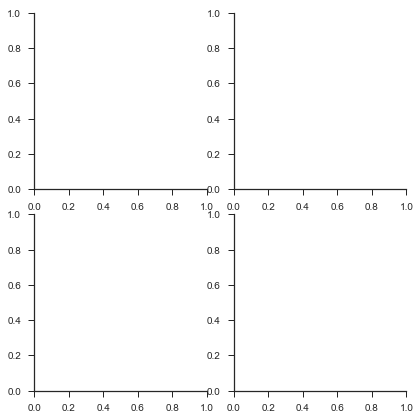

In [5]:
# Initialize a 2x2 grid of facets using the tips dataset:
sns.set(style="ticks", color_codes=True)
sns.FacetGrid(tips_data,row = 'time',col = 'smoker')



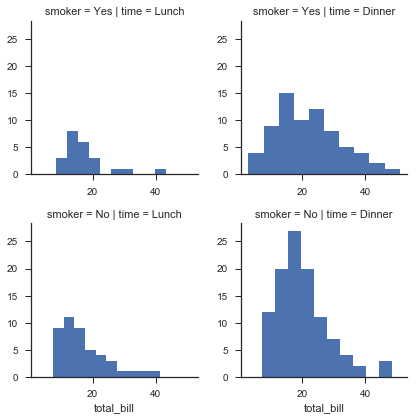

In [6]:
# Draw a univariate plot on each facet:
x = sns.FacetGrid(tips_data,col = 'time',row = 'smoker')
x = x.map(plt.hist,"total_bill")


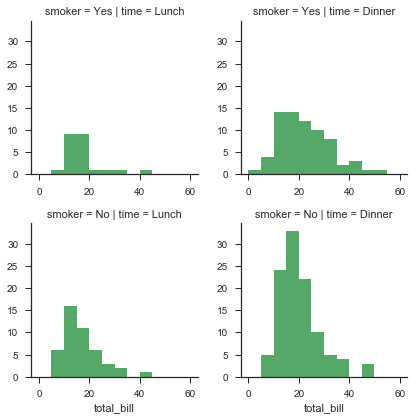

In [13]:
bins = np.arange(0,65,5)
x = sns.FacetGrid(tips_data, col="time",  row="smoker")
x =x.map(plt.hist, "total_bill", bins=bins, color="g")


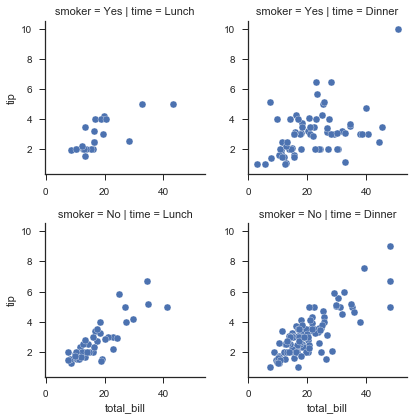

In [14]:
# Plot a bivariate function on each facet:

x = sns.FacetGrid(tips_data, col="time",  row="smoker")
x = x.map(plt.scatter, "total_bill", "tip", edgecolor="w")


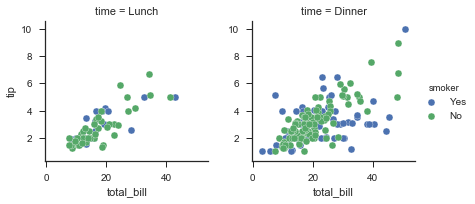

In [15]:
# Assign one of the variables to the color of the plot elements:

x = sns.FacetGrid(tips_data, col="time",  hue="smoker")
x = x.map(plt.scatter,"total_bill","tip",edgecolor = "w")
x =x.add_legend()


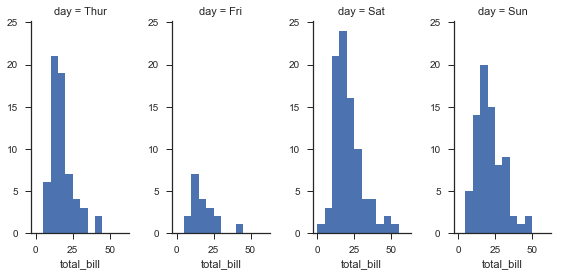

In [17]:
# Change the size and aspect ratio of each facet:

x = sns.FacetGrid(tips_data, col="day", size=4, aspect=.5)
x =x.map(plt.hist, "total_bill", bins=bins)

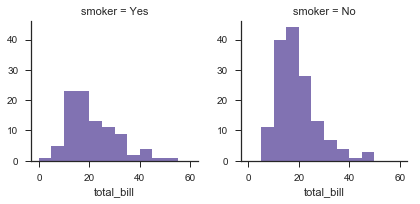

In [19]:
# Specify the order for plot elements:

g = sns.FacetGrid(tips_data, col="smoker", col_order=["Yes", "No"])
g = g.map(plt.hist, "total_bill", bins=bins, color="m")

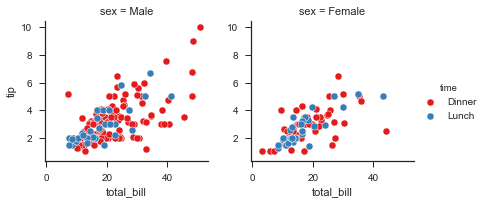

In [26]:
# Use a different color palette:

kws = dict(s=50, linewidth=.5, edgecolor="w")
g =sns.FacetGrid(tips_data, col="sex", hue="time", palette="Set1",\
                   hue_order=["Dinner", "Lunch"]) 

g = g.map(plt.scatter, "total_bill", "tip", **kws)
g.add_legend()

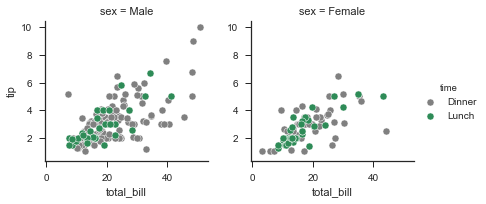

In [30]:
# Use a dictionary mapping hue levels to colors:

pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips_data, col="sex", hue="time", palette=pal,\
                   hue_order=["Dinner", "Lunch"])

g = g.map(plt.scatter, "total_bill", "tip", **kws)
g.add_legend()

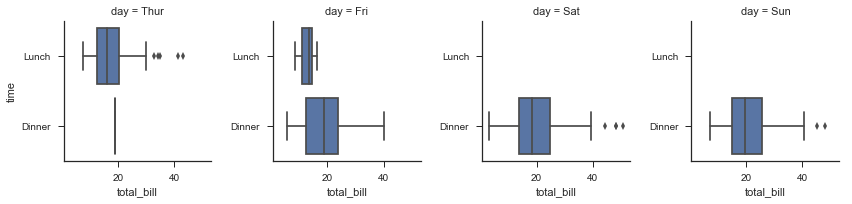

In [31]:
# FacetGrid with boxplot
x = sns.FacetGrid(tips_data,col= 'day')
x = x.map(sns.boxplot,"total_bill","time")
